# G06 SVM and Random Forest - Group 3

**Bin Liao, Lijie Yang, Ziyin Xu**

## Introduction

Bank Customer Churn Case Study

In this notebook, we aim to tackle the problem of customer churn in the banking industry. Customer churn, also known as customer attrition, refers to the phenomenon of customers leaving a service or product. For banks, this would mean customers closing their accounts and leaving the bank.

Customer churn is a significant problem in the banking sector, as acquiring new customers is often more costly than retaining existing ones. Therefore, predicting which customers are most likely to churn can enable a bank to proactively address their issues and retain them, leading to increased profitability.

We will be working with a dataset of 10,000 customers from a bank in the European Union. This dataset includes various details about the customers, such as their credit score, geography, gender, age, tenure with the bank, balance, number of products, credit card status, active membership status, estimated salary, and whether they exited (churned).

The goal of this notebook is to build machine learning models that can predict whether a customer will churn based on these features. Specifically, we will build and compare two models: a Random Forest Classifier and a Support Vector Machine (SVM) Classifier.

We will follow the steps below:

1. **Exploratory Data Analysis (EDA)**: Understand the data and identify any patterns.
2. **Preprocessing**: Clean and format the data so that it can be input into our models. This includes handling missing data, encoding categorical variables, scaling numerical variables, and addressing class imbalance in the target variable.
3. **Model Building**: Train the Random Forest and SVM models on our preprocessed data.
4. **Hyperparameter Tuning**: Fine-tune the parameters of the models to optimize their performance.
5. **Evaluation**: Evaluate **the performance of the models and compare them based on various metrics, such as accuracy, precision, recall, and F1-score.

The business problem we are addressing is customer churn in the banking industry. By predicting which customers are most likely to churn, the bank can take proactive measures to improve customer satisfaction and retention, ultimately leading to increased profitability.


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Exploratory Data Analysis (EDA):

In this process, we will improt the data set from the github, and using the name "bank_customer_df" in the variable. Then we will analysis to understand the data and identify any patterns

In [4]:
url = 'https://raw.githubusercontent.com/Bencool/MBA6636-Business-Analytics/main/datas/Bank_Churn_Data.csv'
bank_customer_df = pd.read_csv(url, sep = ',')

bank_customer_df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
bank_customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1015.8+ KB


In [8]:
bank_customer_df.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
bank_customer_df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


The dataset consists of 13 columns, each representing different aspects of a bank customer's profile. The "Exited" column, which indicates whether a customer has churned or not, is our target variable. The remaining columns are potential features that we can use to predict customer churn.

We will remove unnecessary data such as **'RowNumber'** and **'CustomerId'**.

Then, check for missing valuse and perform some basic exploratory data analysis.

In [11]:
bank_customer_df = bank_customer_df.drop('RowNumber', axis=1)
bank_customer_df = bank_customer_df.drop('CustomerId', axis=1)

In [12]:
# Check for missing values
missing_values = bank_customer_df.isnull().sum()

# Check the balance of the target variable 'Exited'
class_balance = bank_customer_df['Exited'].value_counts(normalize=True)

missing_values, class_balance

(CreditScore        0
 Geography          0
 Gender             0
 Age                0
 Tenure             0
 Balance            0
 NumOfProducts      0
 HasCrCard          0
 IsActiveMember     0
 EstimatedSalary    0
 Exited             0
 dtype: int64,
 0    0.7963
 1    0.2037
 Name: Exited, dtype: float64)

There is no missig values in the dataset.

Let's check the unit values of each variable.

In [15]:
# Categorical Data Description
bank_customer_df.describe(include=['object']).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [16]:
bank_customer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [18]:
# unique data in dataframe
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

report(bank_customer_df)

,Column,d_type,unique_sample,n_uniques
0,CreditScore,int64,"[619, 608, 502, 699, 850]",460
1,Geography,object,"[France, Spain, Germany]",3
2,Gender,object,"[Female, Male]",2
3,Age,int64,"[42, 41, 39, 43, 44]",70
4,Tenure,int64,"[2, 1, 8, 7, 4]",11
5,Balance,float64,"[0.0, 83807.86, 159660.8, 125510.82, 113755.78]",6382
6,NumOfProducts,int64,"[1, 3, 2, 4]",4
7,HasCrCard,int64,"[1, 0]",2
8,IsActiveMember,int64,"[1, 0]",2
9,EstimatedSalary,float64,"[101348.88, 112542.58, 113931.57, 93826.63, 79...",9999


Now let's explore the data further by analyzing the distribution of the different features. We'll look at both the numerical and categorical features.

<AxesSubplot:>

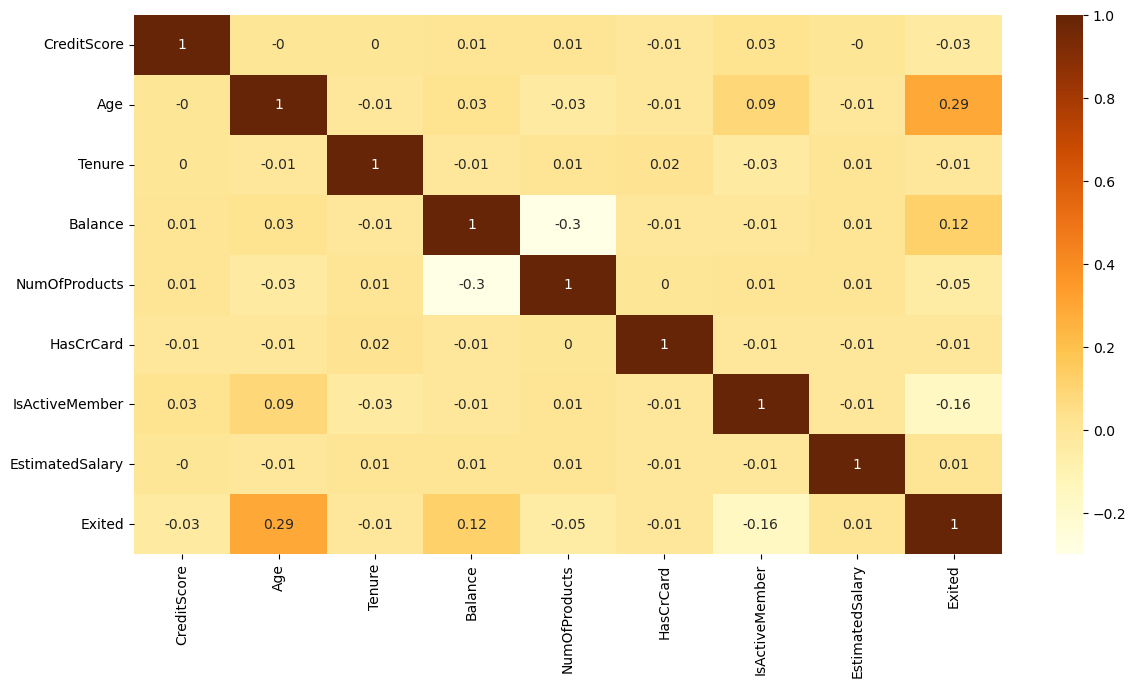

In [20]:
# Heatmap for the dataset variable:

correlation = bank_customer_df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

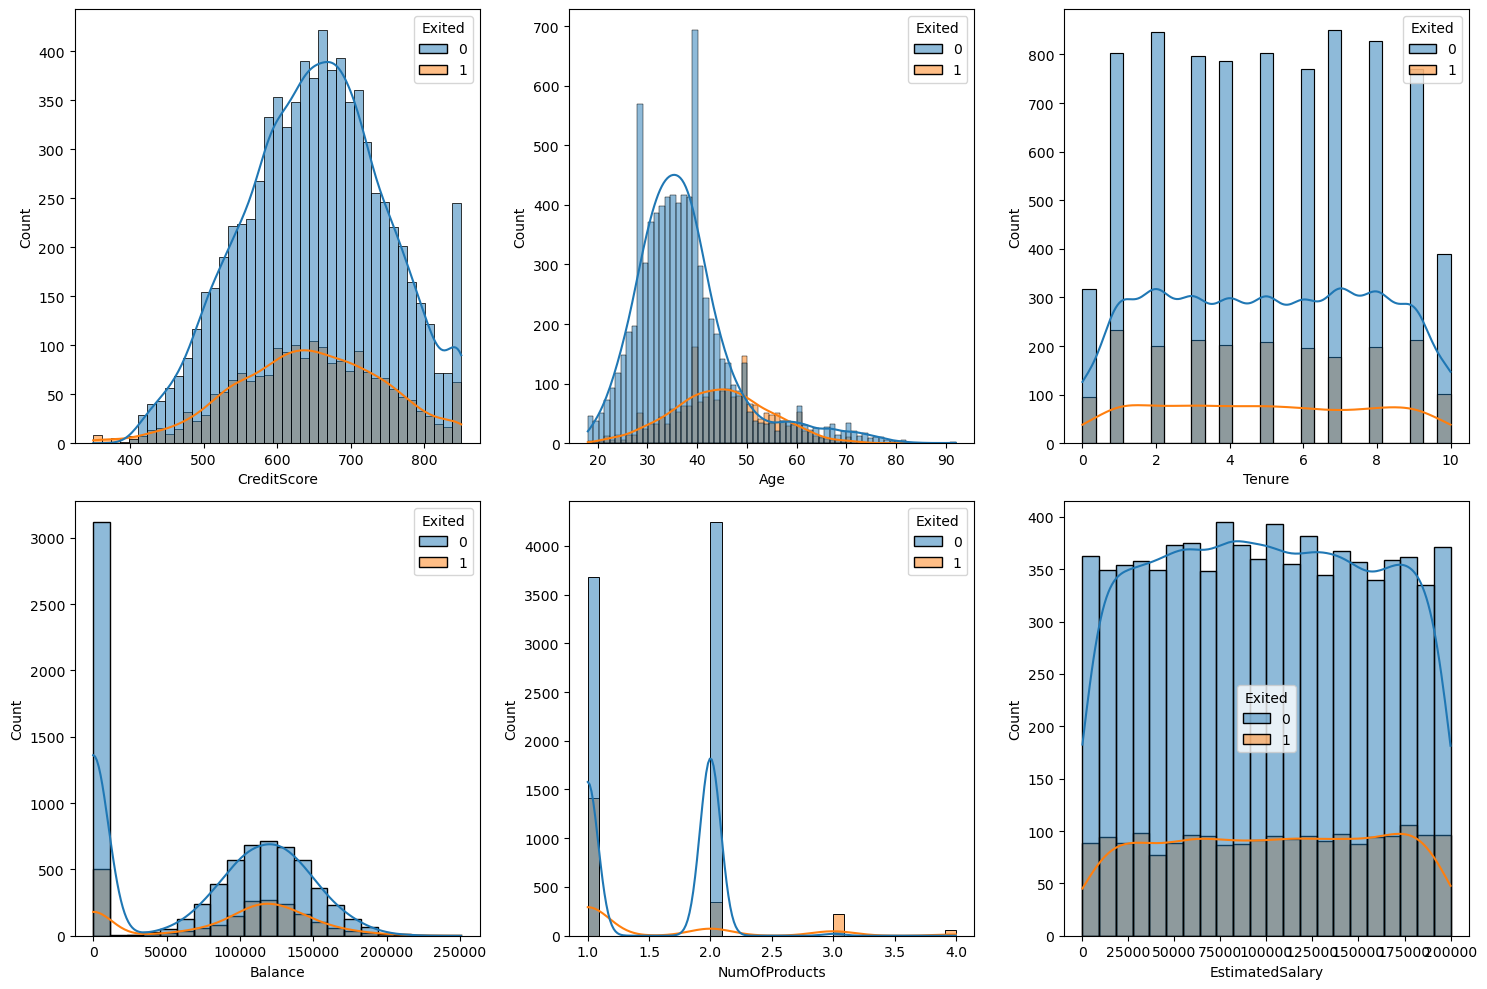

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# List of categorical features
cat_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Plotting the numerical features
plt.figure(figsize=(15,10))
for i in range(len(num_features)):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=bank_customer_df, x=num_features[i], kde=True, hue='Exited')
plt.tight_layout()
plt.show()

From the numerical features:

- **Credit Score**: Most customers have a credit score between 600 and 700. We can see a slight difference in the distribution for churned customers, but it's not significantly distinct.

- **Age**: Younger customers are less likely to churn. As age increases, the likelihood of churn also increases.

- **Tenure**: Tenure doesn't show a clear trend in terms of customer churn.

- **Balance**: Customers with a balance of zero are less likely to churn. Customers with higher balances show a higher churn rate.

- **Number of Products**: Customers with one or two bank products are less likely to churn compared to those with three or four products.

- **Estimated Salary**: The estimated salary doesn't show a clear trend in terms of customer churn.

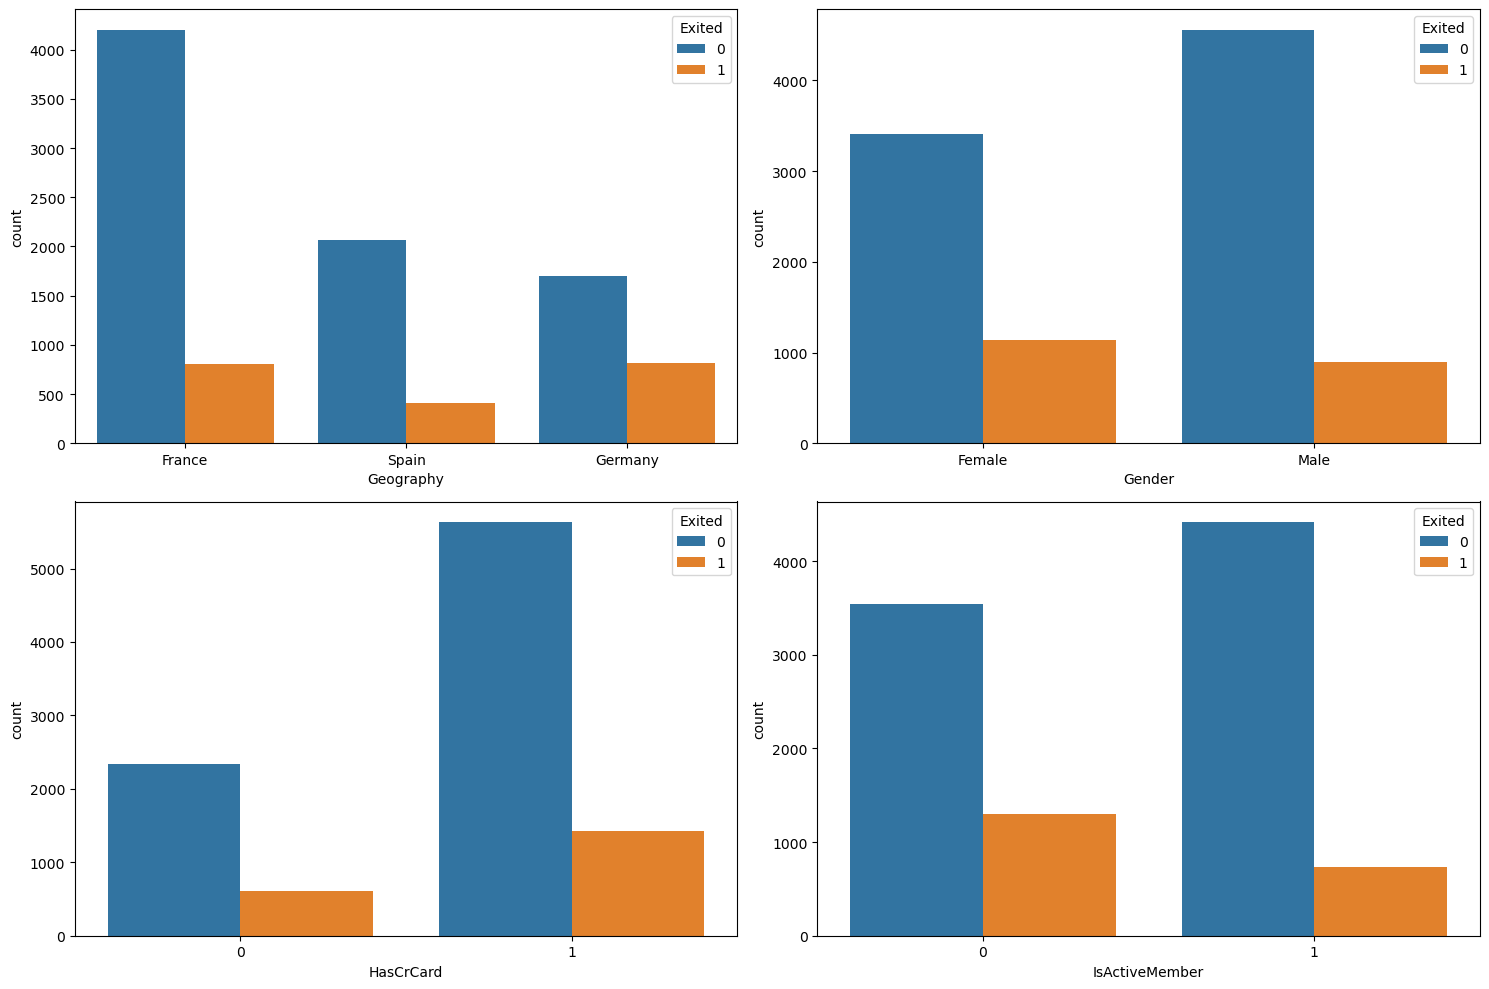

In [23]:
# Plotting the categorical features
plt.figure(figsize=(15,10))
for i in range(len(cat_features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=bank_customer_df, x=cat_features[i], hue='Exited')
plt.tight_layout()
plt.show()

## Preprocessing:

We will preprocess our data before we can build our models. This involves encoding our categorical features, scaling our numerical features, and handling the class imbalance in our target variable.

In [24]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [26]:
# Define preprocessing for numerical columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# Split the data into features (X) and target (y)
X = bank_customer_df.drop('Exited', axis=1)
y = bank_customer_df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply transformations to the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


## Modle Building and Evaluation

### Random Forest Classifier

In [29]:
# Initialize the RandomForest classifiers with 'balanced' class weight
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the classifiers
rf_clf.fit(X_train, y_train)

# Predict on the test set
rf_preds = rf_clf.predict(X_test)
# Evaluate the models
rf_report = classification_report(y_test, rf_preds)

print("Random Forest Model - Classification Report:")
print("---------------------------------------------")
print(rf_report)

Random Forest Model - Classification Report:
---------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



Random Forest Classifier

- Accuracy: 86%
- Precision (Churned): 76%
- Recall (Churned): 45%
- F1-Score (Churned): 56%

### Support Vector Machine (SVM)

In [30]:
# Initialize the SVM classifiers with 'balanced' class weight
svc_clf = SVC(class_weight='balanced', random_state=42)

# Train the classifiers
svc_clf.fit(X_train, y_train)

# Predict on the test set
svc_preds = svc_clf.predict(X_test)

# Evaluate the models
svc_report = classification_report(y_test, svc_preds)

print("SVM Model - Classification Report:")
print("---------------------------------------------")
print(svc_report)

SVM Model - Classification Report:
---------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1607
           1       0.47      0.76      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000



Support Vector Machine (SVM) Classifier

- Accuracy: 79%
- Precision (Churned): 47%
- Recall (Churned): 76%
- F1-Score (Churned): 58%

Form the output, we found that the Random Forest model has a higher overall accuracy, the SVM model has a higher recall for the churned customers, which could be more important in this scenario. A higher recall indicates that the model is better at identifying customers who are likely to churn. This can help the bank take preventive measures to retain those customers.

## Hyperparameters turnning

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score


# Define scoring function (e.g., F1-score)
scoring_function = make_scorer(f1_score)


# Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for Random Forest classifiers
rf_grid = GridSearchCV(rf_clf, rf_params, cv=3, scoring=scoring_function)

# Fit GridSearchCV
rf_grid.fit(X_train, y_train)

# Get the best parameters
rf_best_params = rf_grid.best_params_

print("Optimal parameters for Random Forest:")
print("---------------------------------------------")
print(rf_best_params)


Optimal parameters for Random Forest:
---------------------------------------------
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


Random Forest Best Hyperparameters
- 'max_depth': 10: This is the maximum depth of the trees in the forest. A max depth of 5 means that the decision trees in the Random Forest have a maximum of 10 levels.
- 'min_samples_split': 10: This is the minimum number of samples required to split an internal node. In this case, if a node has at least 10 samples, it can be split into child nodes.
-'n_estimators': 300: This is the number of trees in the forest. In this case, the Random Forest consists of 300 individual decision trees.

In [38]:
# Define hyperparameters for SVC
svc_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearchCV for both classifiers
svc_grid = GridSearchCV(svc_clf, svc_params, cv=3, scoring=scoring_function)

# Fit GridSearchCV
svc_grid.fit(X_train, y_train)

# Get the best parameters
svc_best_params = svc_grid.best_params_

print("Optimal parameters for SVC")
print("---------------------------------------------")
print(svc_best_params)

Optimal parameters for SVC
---------------------------------------------
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Support Vector Machine (SVM) Best Hyperparameters
- 'C': 1: This is the regularization parameter, controlling the trade-off between achieving a low training error and a low testing error. A smaller value of 'C' creates a wider margin, allowing some misclassification on the training data to achieve better generalization.
- 'gamma': 'scale': This is the kernel coefficient for the 'rbf' (Radial Basis Function) kernel. 
- 'kernel': 'rbf': This is the type of kernel used in the SVM. The Radial Basis Function kernel is a popular choice for SVM classification.

In [37]:
# Initialize the  Random Forest classifiers with best parameters
rf_clf_best = RandomForestClassifier(class_weight='balanced', random_state=42, **rf_best_params)

# Train the classifiers
rf_clf_best.fit(X_train, y_train)

# Predict on the test set
rf_preds_best = rf_clf_best.predict(X_test)

# Evaluate the models
rf_report_best = classification_report(y_test, rf_preds_best)

print("Random Forest Model - Optimal Classification Report:")
print("---------------------------------------------")
print(rf_report_best)


Random Forest Model - Optimal Classification Report:
---------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1607
           1       0.57      0.68      0.62       393

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000



In [39]:
# Initialize the SVC classifiers with best parameters
svc_clf_best = SVC(class_weight='balanced', random_state=42, **svc_best_params)

# Train the SVC classifiers
svc_clf_best.fit(X_train, y_train)

# Predict on the test set
svc_preds_best = svc_clf_best.predict(X_test)

# Evaluate the models
svc_report_best = classification_report(y_test, svc_preds_best)

print("SVC Model - Optimal Classification Report:")
print("---------------------------------------------")
print(svc_report_best)

SVC Model - Optimal Classification Report:
---------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1607
           1       0.47      0.76      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000

